# House Price Prediction Competition

## Abstract

First competition with fellow DSS member.
The goal is to predict the home price. 

The best technique I want to use are:

* Random Forest Regressor
* Gradient boosting
* Emsemble Learning
* Support Vector Regression

## Initialize

In [1]:
### Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

In [2]:
### Read the dataset
df = pd.read_csv('Data/train.csv', index_col=0)

In [3]:
# Viewing the data
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
values = ['OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'LotArea',
'MSSubClass',
'MSZoning',
'Neighborhood',
'MasVnrArea',
'ExterQual',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtFinSF1',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'GrLivArea',
'FullBath',
'KitchenQual',
'TotRmsAbvGrd',
'Fireplaces',
'GarageYrBlt',
'GarageCars',
'GarageArea']

In [ ]:
for col in values:
    
    print((col, df[col].isnull().sum()))

MSSubClass
MSZoning
LotArea
Neighborhood
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtFinSF1
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
KitchenQual
TotRmsAbvGrd
Fireplaces


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


GarageYrBlt
GarageCars
GarageArea


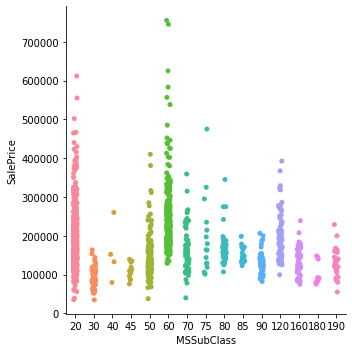

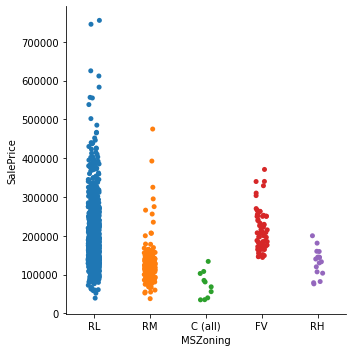

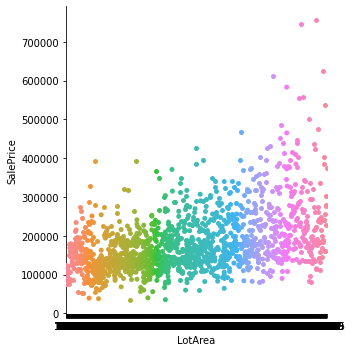

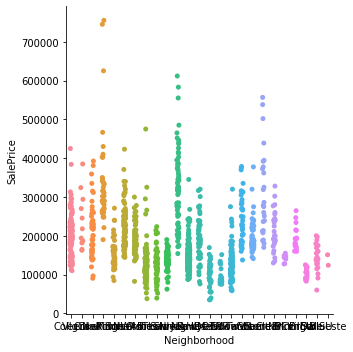

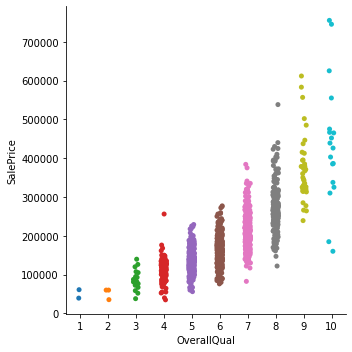

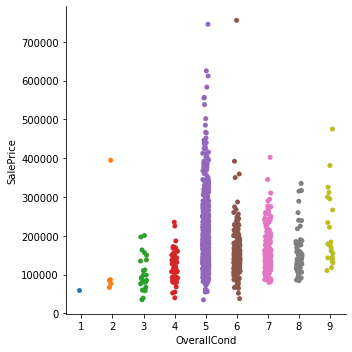

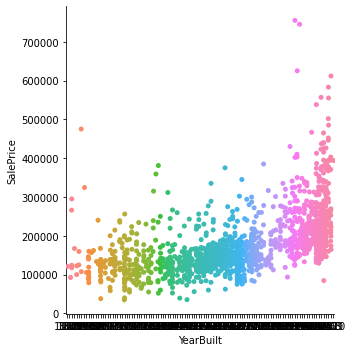

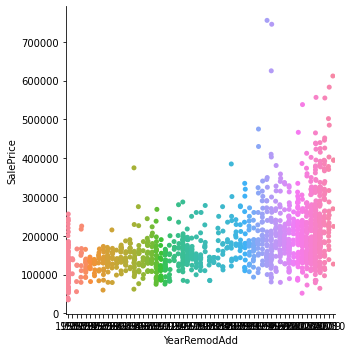

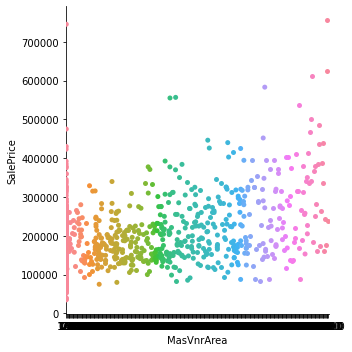

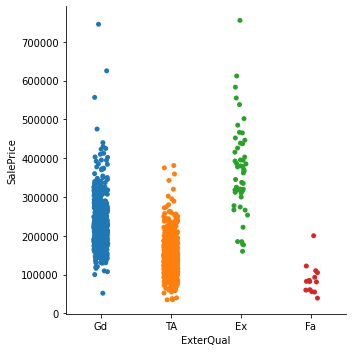

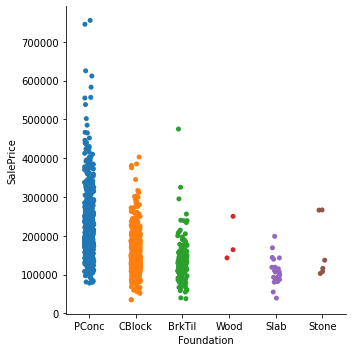

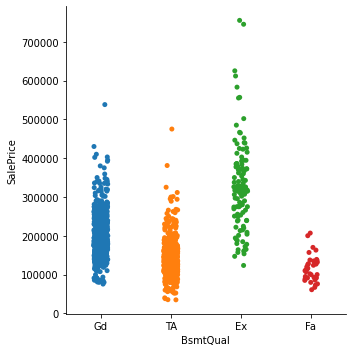

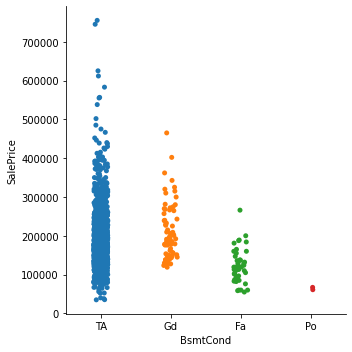

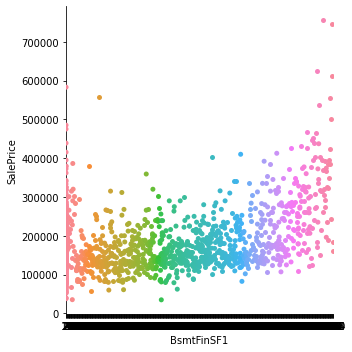

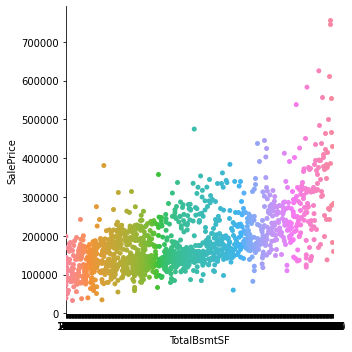

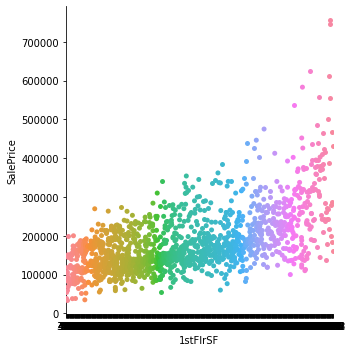

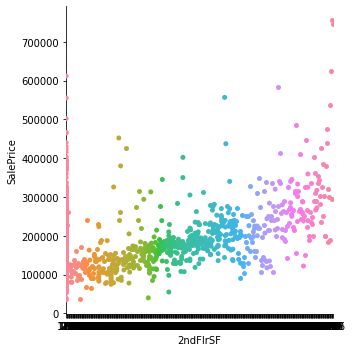

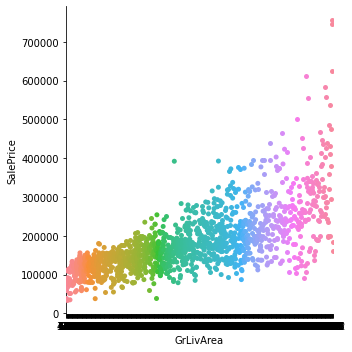

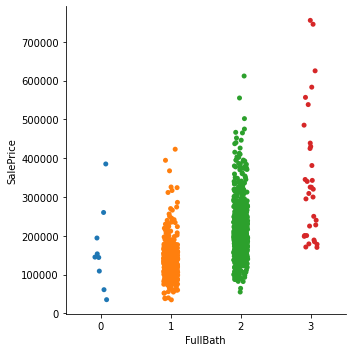

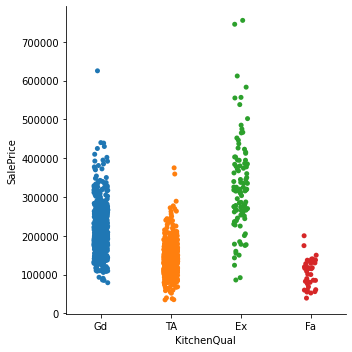

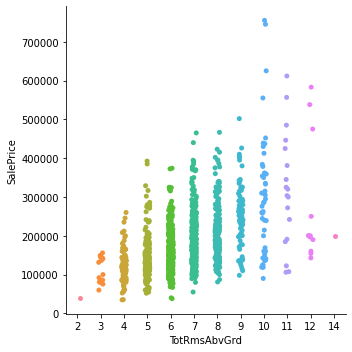

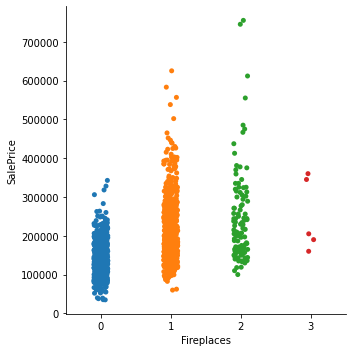

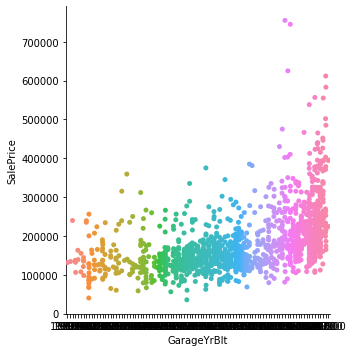

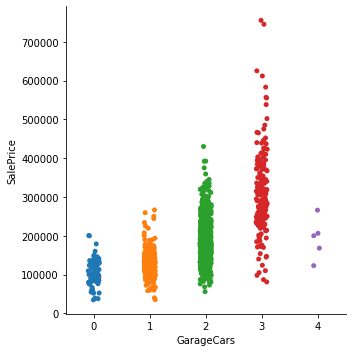

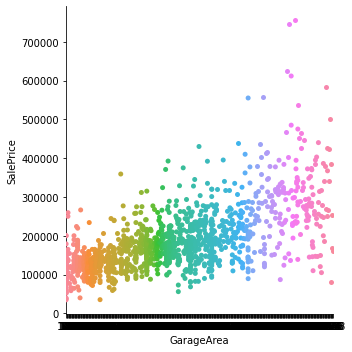

In [58]:
# Viewing Only Important
for i in range(0, 80):
    cat = df.columns[i]
    if cat in values:
        print(cat)
        sns.catplot(x=cat, y="SalePrice", data=df)

MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType


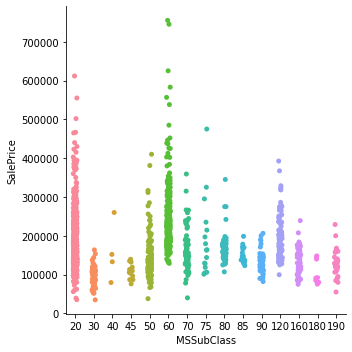

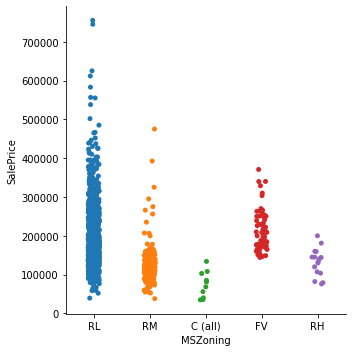

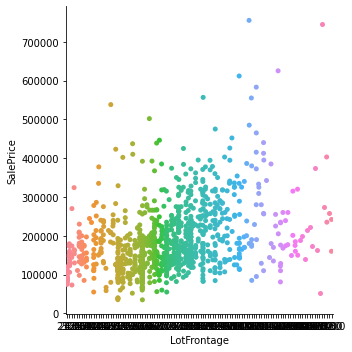

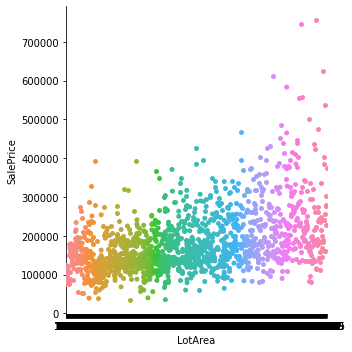

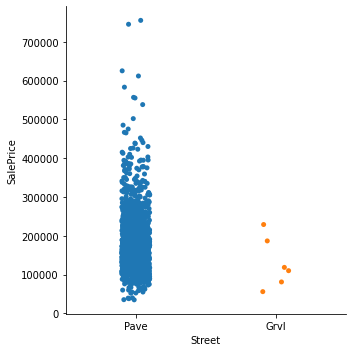

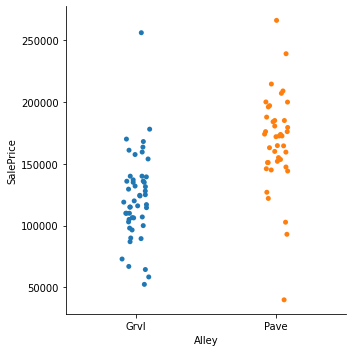

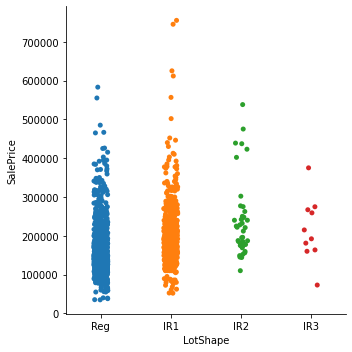

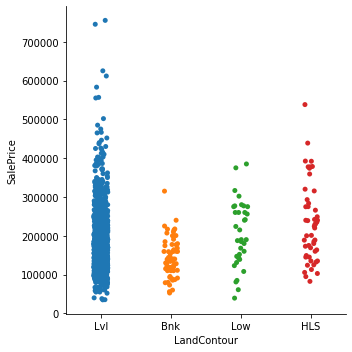

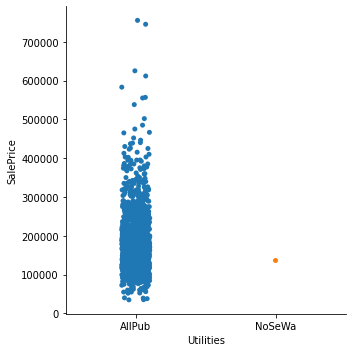

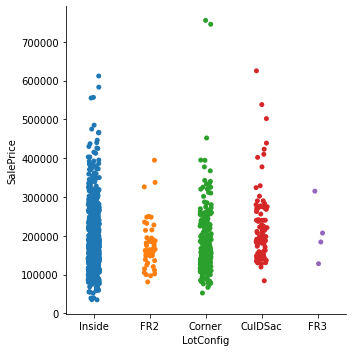

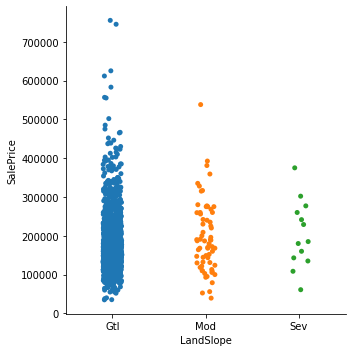

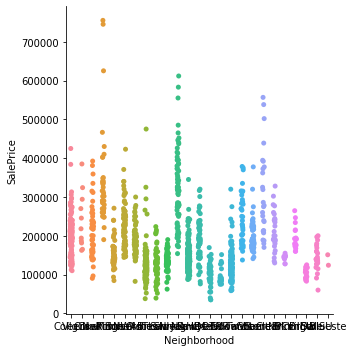

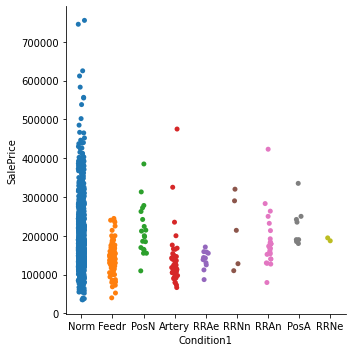

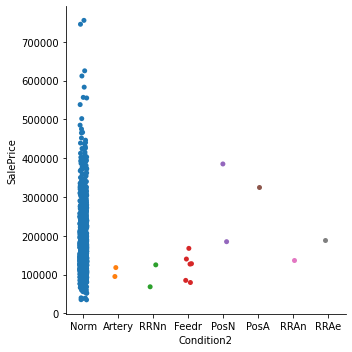

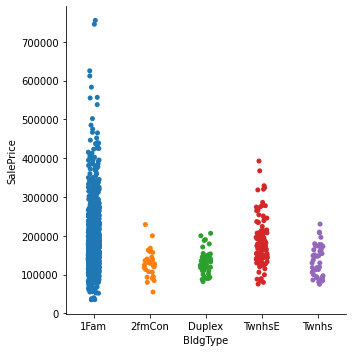

In [52]:
for i in range(0, 15):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)

HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual


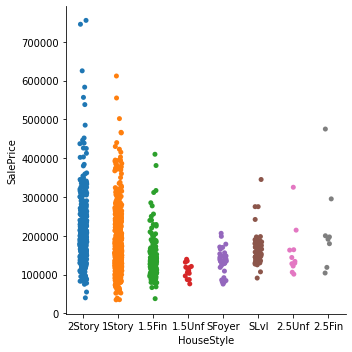

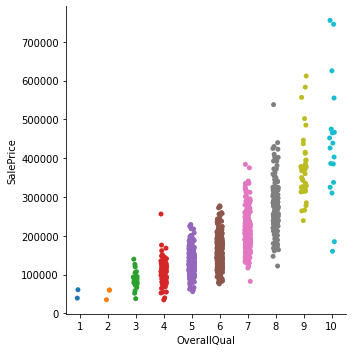

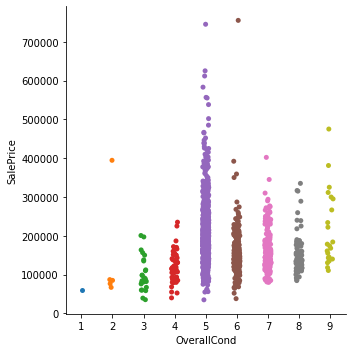

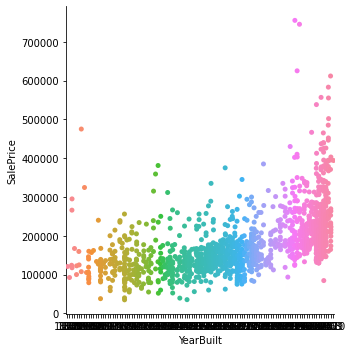

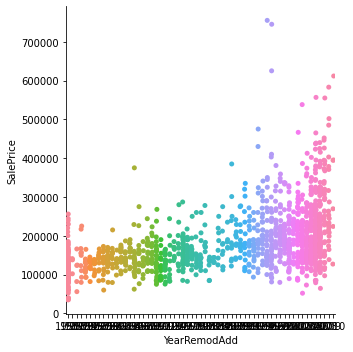

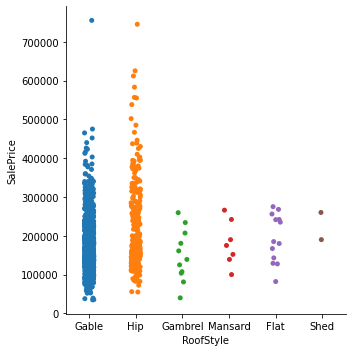

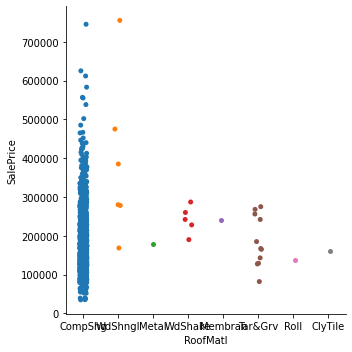

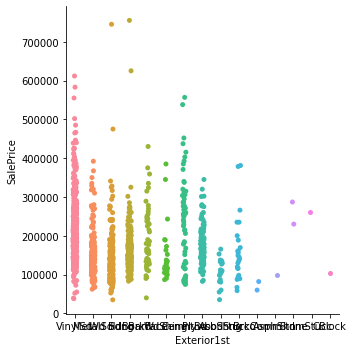

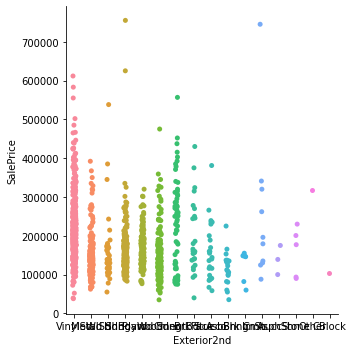

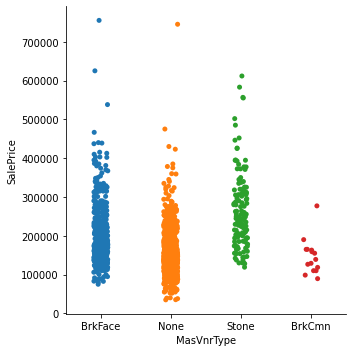

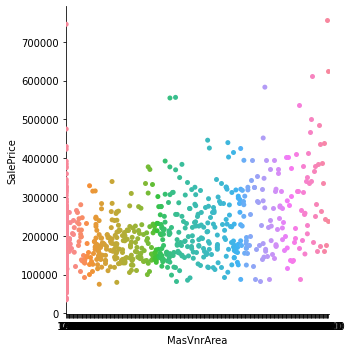

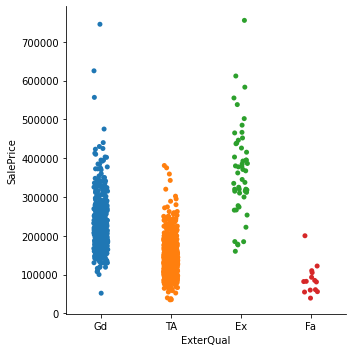

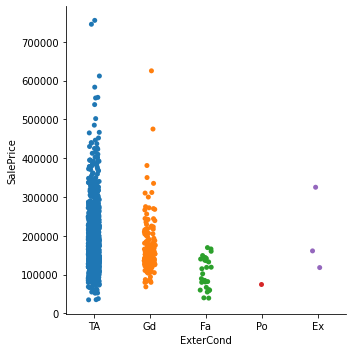

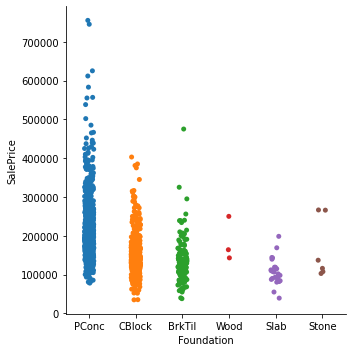

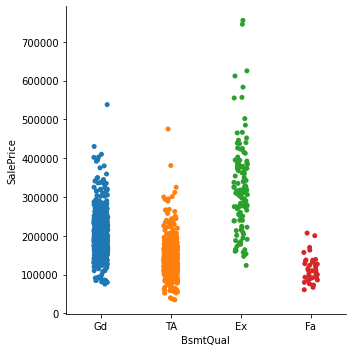

In [53]:
for i in range(15, 30):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)
    

BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF


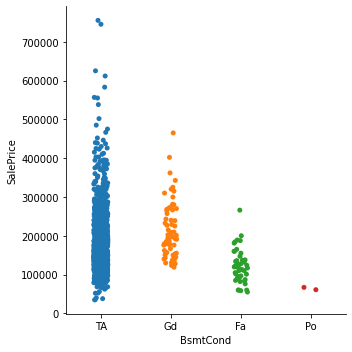

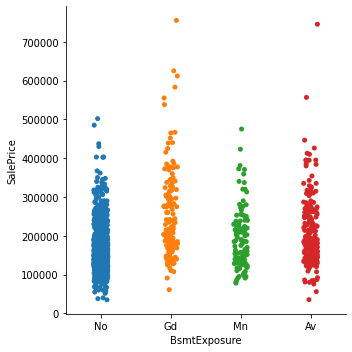

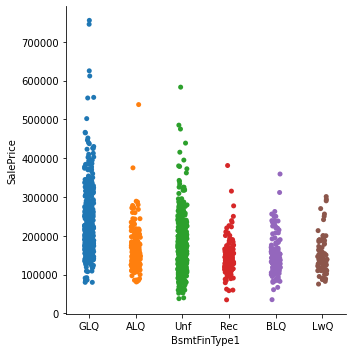

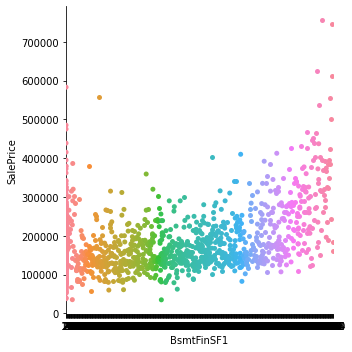

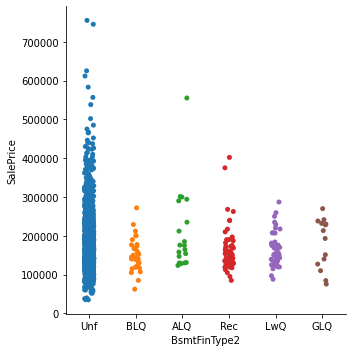

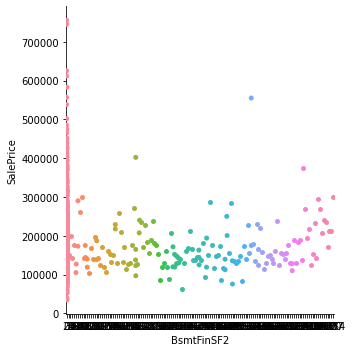

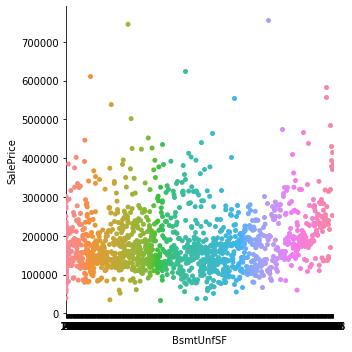

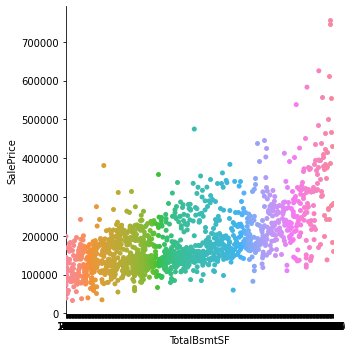

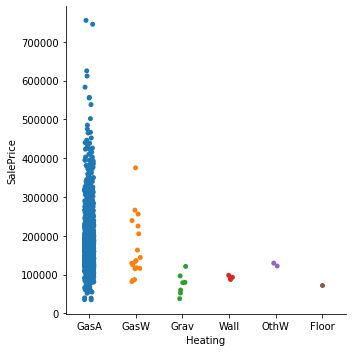

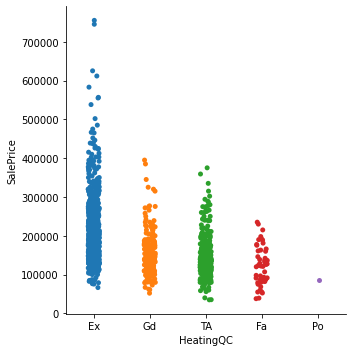

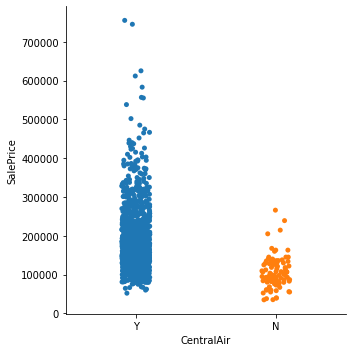

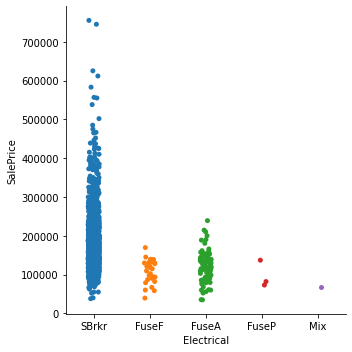

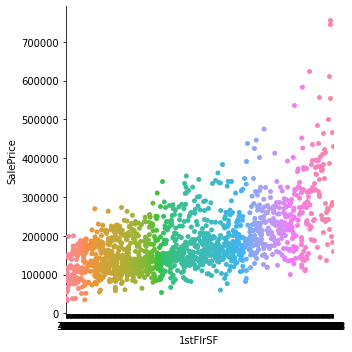

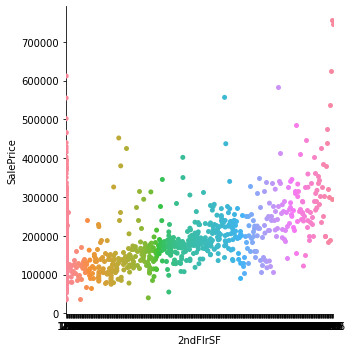

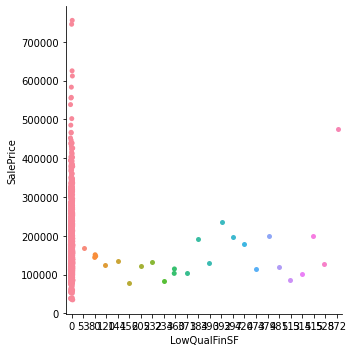

In [55]:
for i in range(30, 45):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)
    

GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish


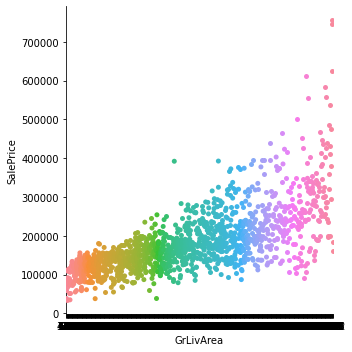

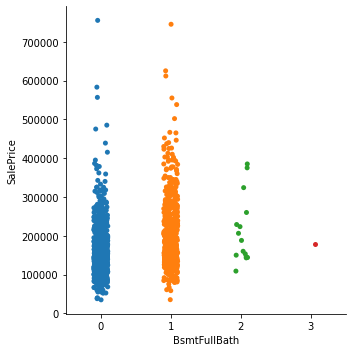

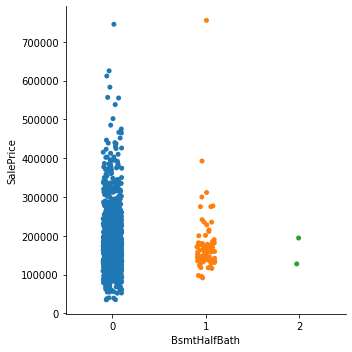

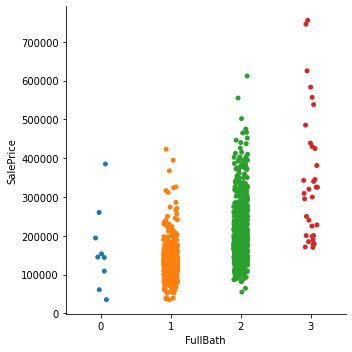

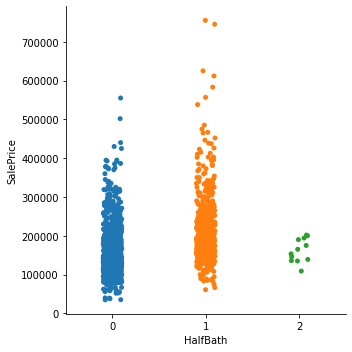

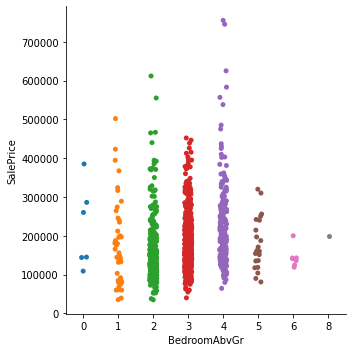

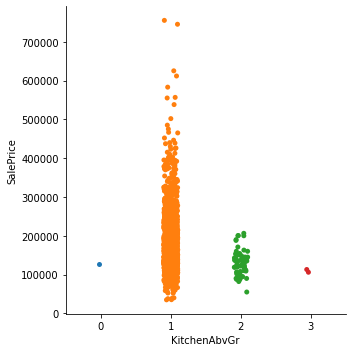

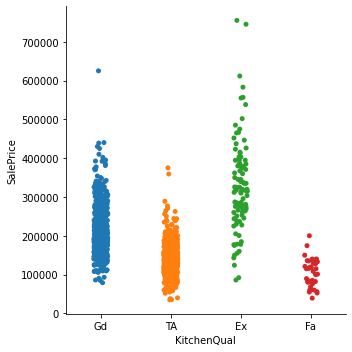

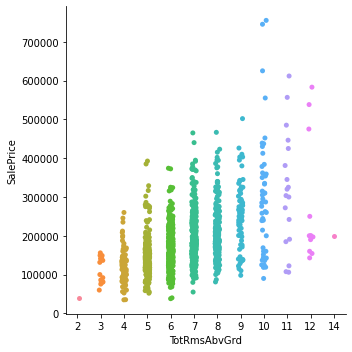

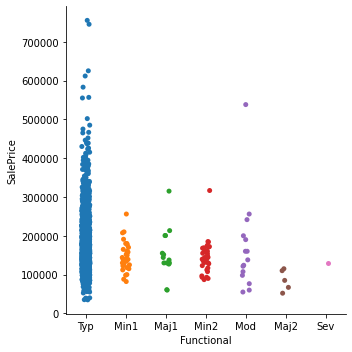

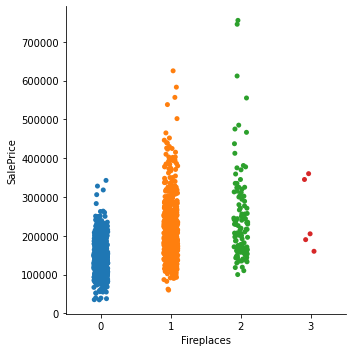

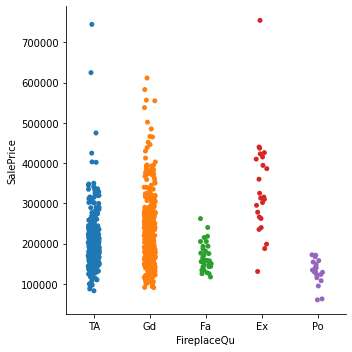

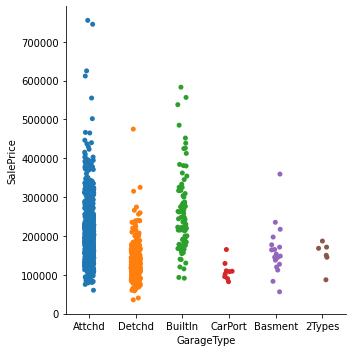

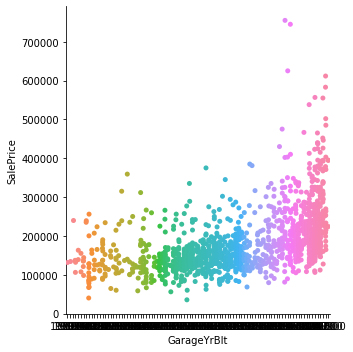

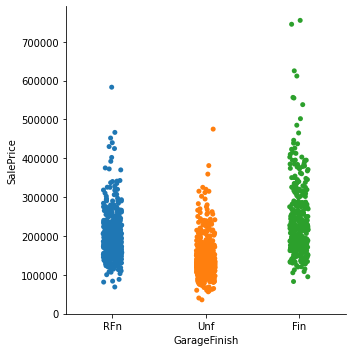

In [56]:
for i in range(45, 60):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)
    

GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


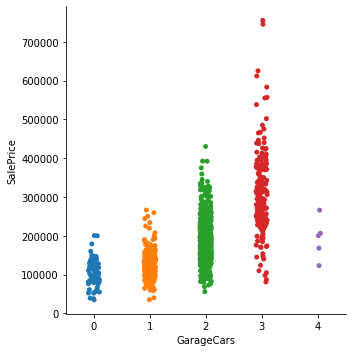

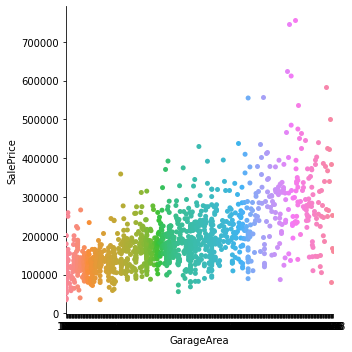

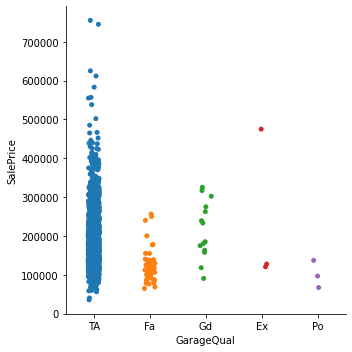

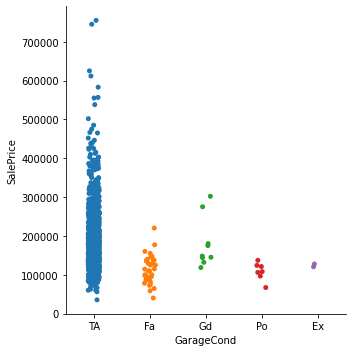

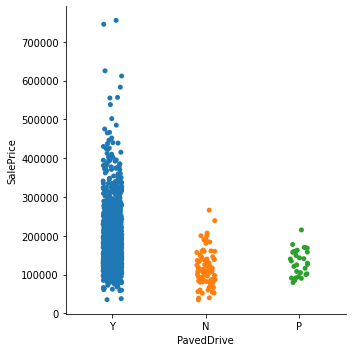

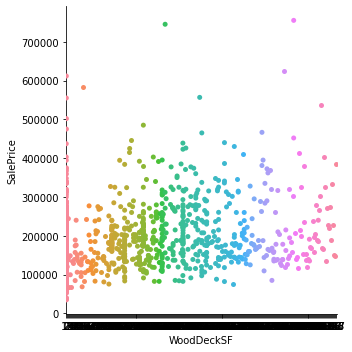

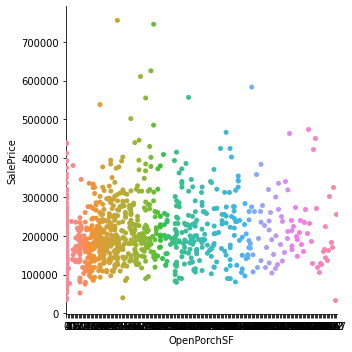

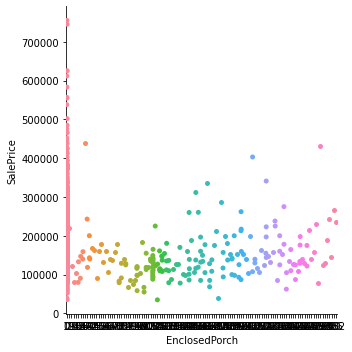

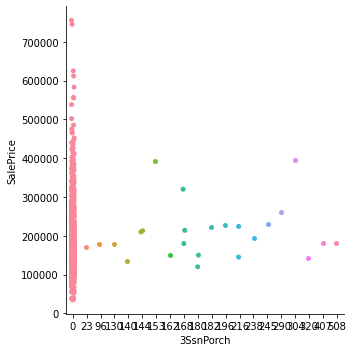

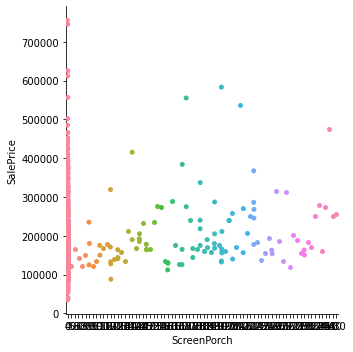

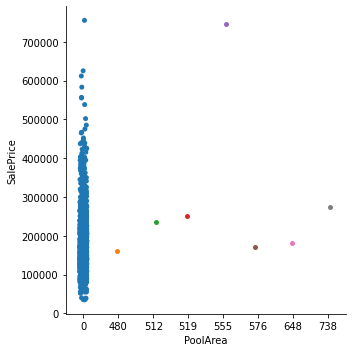

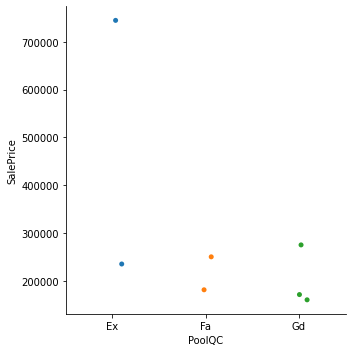

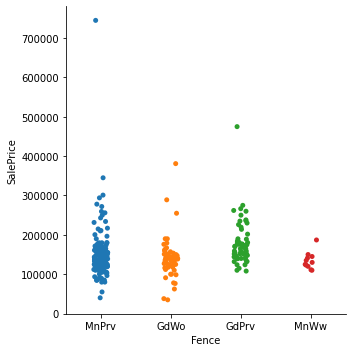

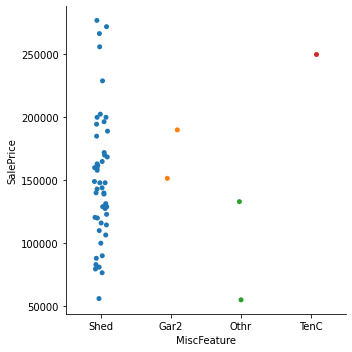

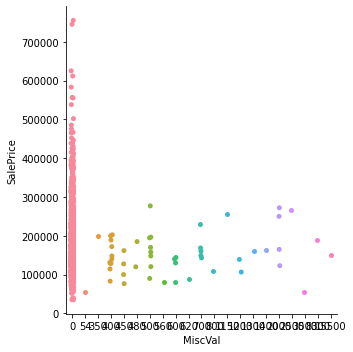

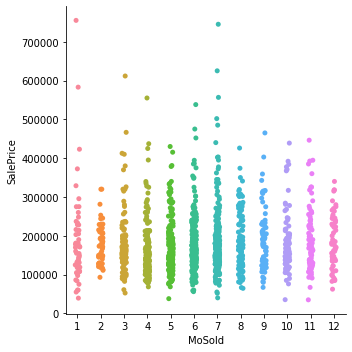

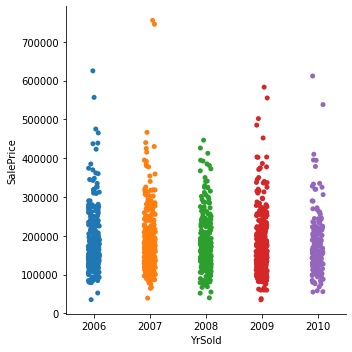

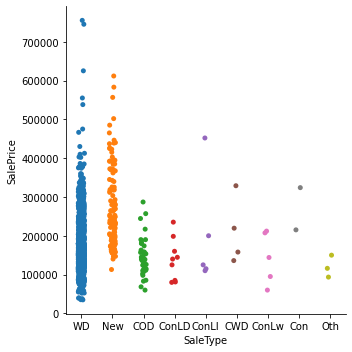

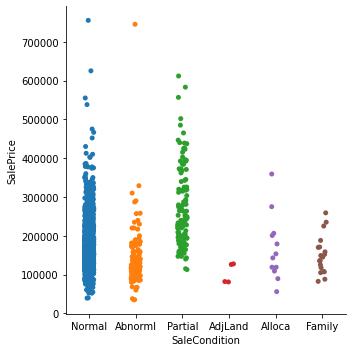

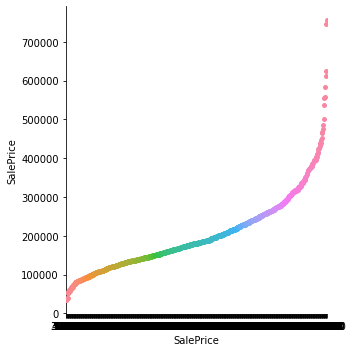

In [57]:
for i in range(60, 80):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)

In [3]:
# View the columns
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

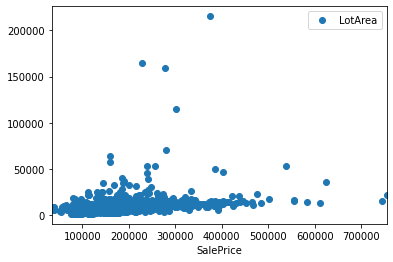

In [7]:
df.plot('SalePrice', 'LotArea', style='o')

In [9]:
# See where there is missing info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [27]:
# Change all str into numbers
objects = []

for col in df:
    if np.dtype(df[col]) == object:
        objects.append(col)

In [28]:
for all_col in objects:
    print(df[all_col].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng

In [29]:
# Change them in the dataset
for cols in objects:
    df[cols] = df[cols].astype('category').cat.codes

In [30]:
# Prove to yourself this is happening
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,-1,3,3,0,4,...,0,-1,-1,-1,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,-1,3,3,0,2,...,0,-1,-1,-1,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,-1,0,3,0,4,...,0,-1,-1,-1,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,-1,0,3,0,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,-1,0,3,0,2,...,0,-1,-1,-1,0,12,2008,8,4,250000


In [31]:
# Remove all the np.nan inside the number arrays
float_objects = []

for col in df:
    if np.dtype(df[col]) == float or np.dtype(df[col]) == int :
        float_objects.append(col)

In [32]:
# Changing them in the dataset
for floats in float_objects:
    df[floats] = df[floats].fillna(0)

In [15]:
# Show this
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,-1,3,3,0,4,...,0,-1,-1,-1,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,-1,3,3,0,2,...,0,-1,-1,-1,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,-1,0,3,0,4,...,0,-1,-1,-1,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,-1,0,3,0,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,-1,0,3,0,2,...,0,-1,-1,-1,0,12,2008,8,4,250000


In [33]:
# Imports
import sklearn
from sklearn import svm, preprocessing

In [34]:
# Shuffle the data
df = sklearn.utils.shuffle(df)

In [62]:
df = sklearn.utils.shuffle(df)

# Drop the SalePrice
x1 = df.drop('SalePrice', axis=1)
    

# Get those Values
X = x1.values

# Preprocess the input values
X = preprocessing.scale(X)

# Return the SalePrice
y = df['SalePrice'].values


# Seperate the Dataset
test_size = 3
X_train = X[:-test_size]
y_train = y[:-test_size]s

X_test = X[-test_size:]
y_test = y[-test_size:]


# Do a Science
reg = sklearn.svm.SVR(kernel='linear', C=7000, epsilon=0.001, tol=0.0001)

#reg = SGDRegressor(max_iter=100, l1_ratio=1, alpha=0.001, tol=0.001)

reg.fit(X_train, y_train)

print(reg.score(X_test, y_test))
print('')

0.9503473836056511



In [40]:
len(df)*0.1

146.0

In [ ]:
# Testing

In [8]:
df['MSZoning']

Id
1       RL
2       RL
3       RL
4       RL
5       RL
        ..
1456    RL
1457    RL
1458    RL
1459    RL
1460    RL
Name: MSZoning, Length: 1460, dtype: object

In [9]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [3]:
df['MSZoning'] = df.MSZoning.replace(['C (all)', 'I'], 0)
df['MSZoning'] = df.MSZoning.replace(['RM', 'RH', 'A'],1)
df['MSZoning'] = df.MSZoning.replace(['RL', 'RP'],2)
df['MSZoning'] = df.MSZoning.replace(['FV'],3)

In [4]:
df['Fireplaces'] = df.FireplaceQu.replace([np.nan], 0)
df['Fireplaces'] = df.Fireplaces.replace(['Po', 'Fa'], 1)
df['Fireplaces'] = df.Fireplaces.replace(['TA'],2)
df['Fireplaces'] = df.Fireplaces.replace(['Gd'],3)
df['Fireplaces'] = df.Fireplaces.replace(['Ex'],4)

In [20]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
X_train = df[['LotArea','GrLivArea', 'OverallQual', 'GarageCars', 'Fireplaces', 'MSZoning']][:-200]

#y_uncleaned = houses.SalePrice
y_train = df[['SalePrice']][:-200]


X_test = df[['LotArea', 'GrLivArea', 'OverallQual', 'GarageCars', 'Fireplaces', 'MSZoning']][-200:]

#y_uncleaned = houses.SalePrice
y_test = df[['SalePrice']][-200:]

In [23]:
reg = sklearn.svm.SVR(kernel='linear', C=600, epsilon=0.01, tol=0.0001)

In [24]:
reg.fit(X_train, y_train)

print(reg.score(X_test, y_test))
print('')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5649021327295707

